Accuracy without PCA: 1.0
Classification Report without PCA:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy with PCA: 0.9333333333333333
Classification Report with PCA:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.85      0.88        13
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



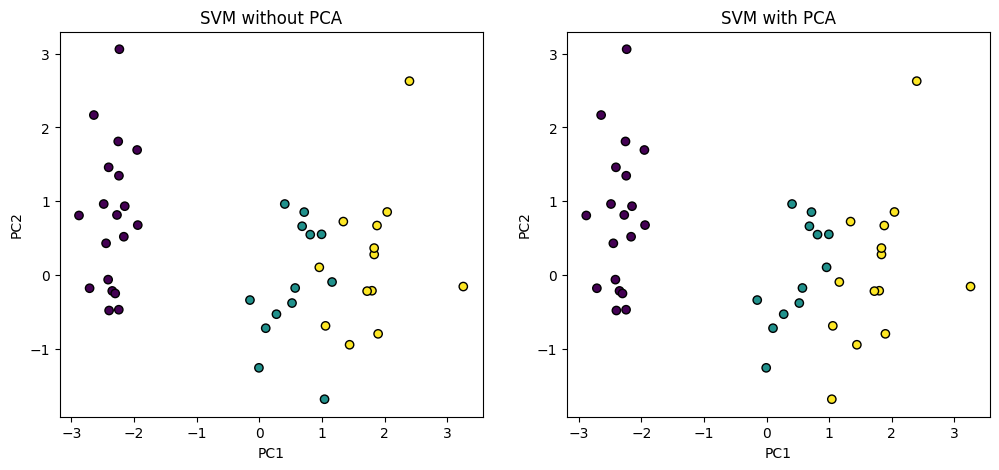

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_no_pca = SVC()
svm_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

print("Accuracy without PCA:", accuracy_score(y_test, y_pred_no_pca))
print("Classification Report without PCA:\n", classification_report(y_test, y_pred_no_pca))

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

print("Accuracy with PCA:", accuracy_score(y_test, y_pred_pca))
print("Classification Report with PCA:\n", classification_report(y_test, y_pred_pca))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_no_pca, cmap='viridis', edgecolors='k')
plt.title("SVM without PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca, cmap='viridis', edgecolors='k')
plt.title("SVM with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()
